<a href="https://colab.research.google.com/github/PeKaEf/Training/blob/main/Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('/content/drive/MyDrive/playground-series-s3e11/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/playground-series-s3e11/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df.head()

id  store_sales(in millions)  unit_sales(in millions)  total_children  \
0   0                      8.61                      3.0             2.0   
1   1                      5.00                      2.0             4.0   
2   2                     14.08                      4.0             0.0   
3   3                      4.02                      3.0             5.0   
4   4                      2.13                      3.0             5.0   

   num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                   2.0                         2.0         10.30   
1                   0.0                         3.0          6.66   
2                   0.0                         3.0         21.30   
3                   0.0                         0.0         14.80   
4                   0.0                         3.0         17.00   

   recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                 1.0      0.0            32.0     36509.0         0.0   
1                 1.0      0.0             1.0     28206.0         1.0   
2                 1.0      0.0            26.0     21215.0         1.0   
3                 0.0      1.0            36.0     21215.0         1.0   
4                 1.0      1.0            20.0     27694.0         1.0   

   video_store  salad_bar  prepared_food  florist    cost  
0          0.0        0.0            0.0      0.0   62.09  
1          0.0        0.0            0.0      0.0  121.80  
2          0.0        0.0            0.0      0.0   83.51  
3          0.0        0.0            0.0      0.0   66.78  
4          1.0        1.0            1.0      1.0  111.51

In [ ]:
train_df.describe(include='all')

id  store_sales(in millions)  unit_sales(in millions)  \
count  360336.000000             360336.000000            360336.000000   
mean   180167.500000                  6.337376                 3.043881   
std    104020.187637                  3.307980                 0.784676   
min         0.000000                  0.510000                 1.000000   
25%     90083.750000                  3.720000                 3.000000   
50%    180167.500000                  5.780000                 3.000000   
75%    270251.250000                  8.400000                 4.000000   
max    360335.000000                 22.920000                 6.000000   

       total_children  num_children_at_home  avg_cars_at home(approx).1  \
count   360336.000000         360336.000000               360336.000000   
mean         2.456482              0.689390                    2.203813   
std          1.488992              1.214732                    1.084293   
min          0.000000              0.000000                    0.000000   
25%          1.000000              0.000000                    1.000000   
50%          2.000000              0.000000                    2.000000   
75%          4.000000              1.000000                    3.000000   
max          5.000000              5.000000                    4.000000   

        gross_weight  recyclable_package        low_fat  units_per_case  \
count  360336.000000       360336.000000  360336.000000   360336.000000   
mean       13.822071            0.568086       0.327797       18.972706   
std         4.614792            0.495343       0.469411       10.212912   
min         6.000000            0.000000       0.000000        1.000000   
25%         9.710000            0.000000       0.000000       10.000000   
50%        13.600000            1.000000       0.000000       20.000000   
75%        17.700000            1.000000       1.000000       28.000000   
max        21.900000            1.000000       1.000000       36.000000   

          store_sqft     coffee_bar    video_store      salad_bar  \
count  360336.000000  360336.000000  360336.000000  360336.000000   
mean    28180.333442       0.564839       0.277394       0.504807   
std      5968.874074       0.495779       0.447713       0.499978   
min     20319.000000       0.000000       0.000000       0.000000   
25%     23593.000000       0.000000       0.000000       0.000000   
50%     27694.000000       1.000000       0.000000       1.000000   
75%     33858.000000       1.000000       1.000000       1.000000   
max     39696.000000       1.000000       1.000000       1.000000   

       prepared_food        florist           cost  
count  360336.000000  360336.000000  360336.000000  
mean        0.504832       0.503191      99.614729  
std         0.499977       0.499991      29.939435  
min         0.000000       0.000000      50.790000  
25%         0.000000       0.000000      70.320000  
50%         1.000000       1.000000      98.810000  
75%         1.000000       1.000000     126.620000  
max         1.000000       1.000000     149.750000

In [ ]:
train_df.dtypes

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object

In [ ]:
train_df.isnull().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

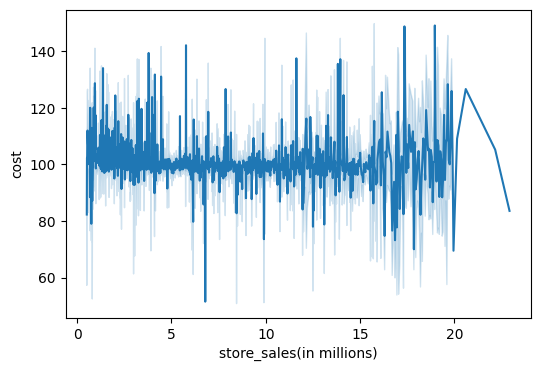

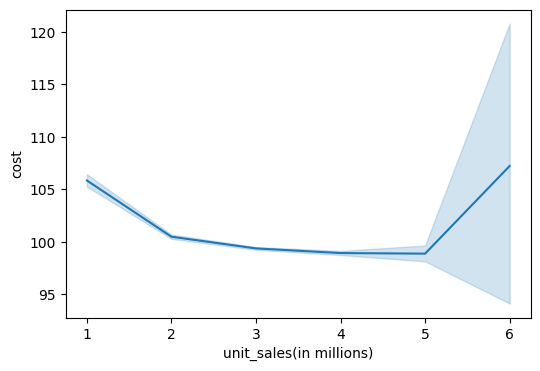

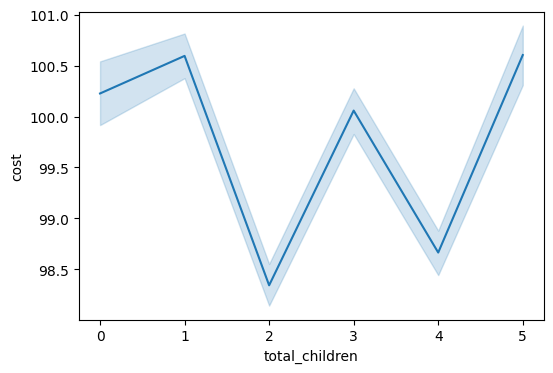

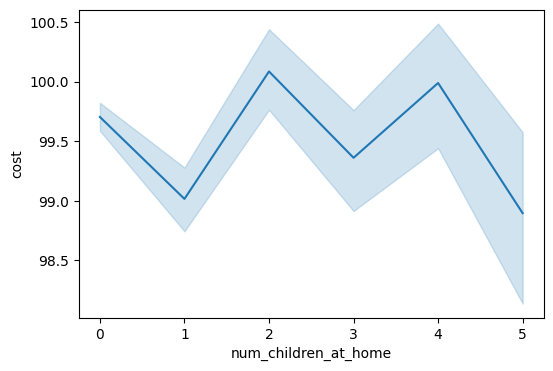

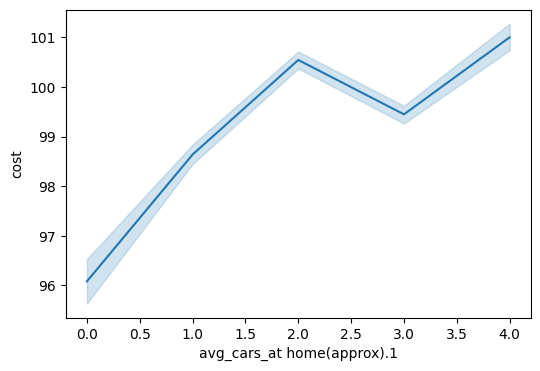

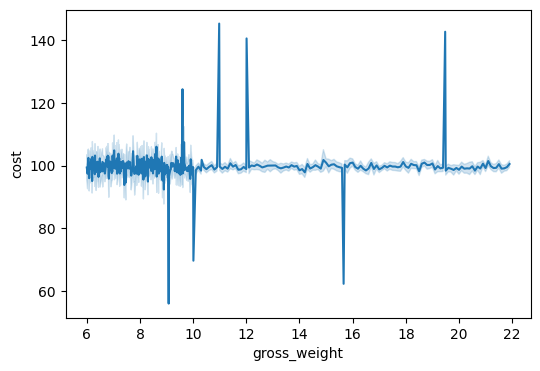

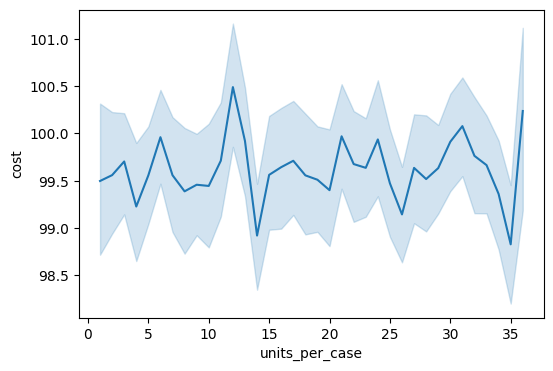

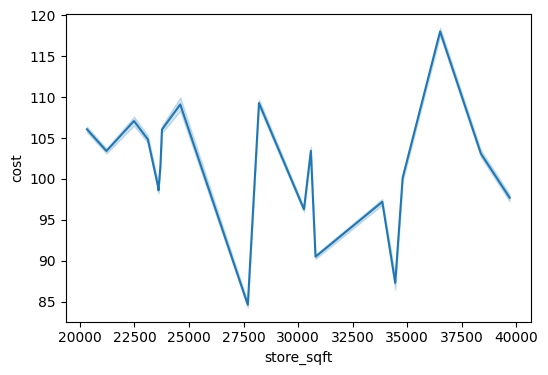

In [ ]:
categorical_features=['recyclable_package','low_fat','coffee_bar','video_store','salad_bar','prepared_food','florist']
numerical_features=['store_sales(in millions)','unit_sales(in millions)','total_children','num_children_at_home','avg_cars_at home(approx).1','gross_weight','units_per_case',
                    'store_sqft']

for f in numerical_features:
  plt.figure(figsize=(6,4))
  sns.lineplot(data=train_df,x=f, y='cost')
  plt.show()

Basing on the above plots we decided to drop the features 'units_per_case' and 'num_children_at_home', because for these features we can have a great range of the target values, so it won't be helpful in training the model properly.

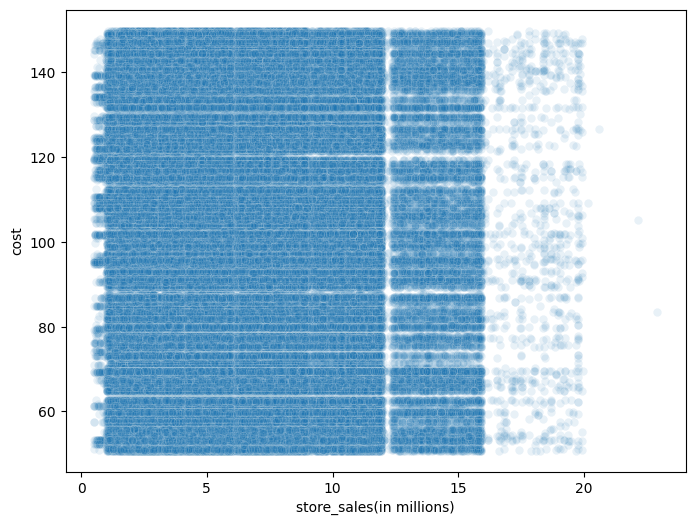

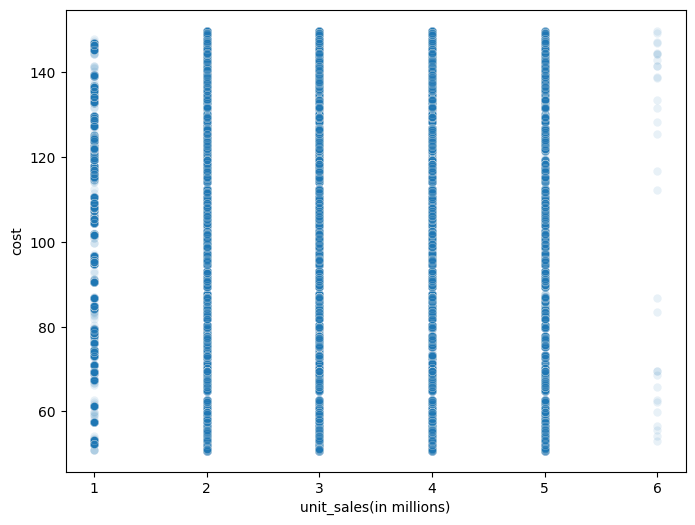

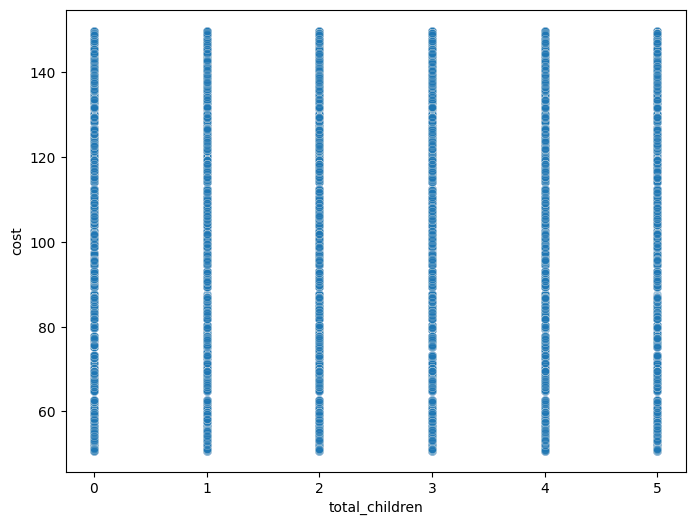

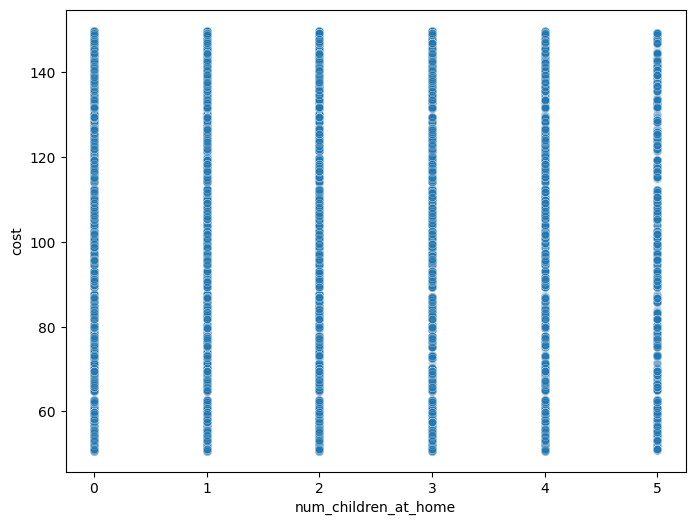

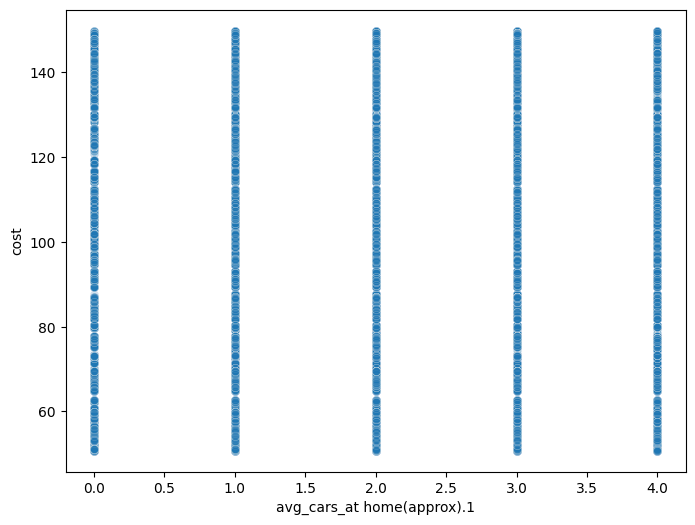

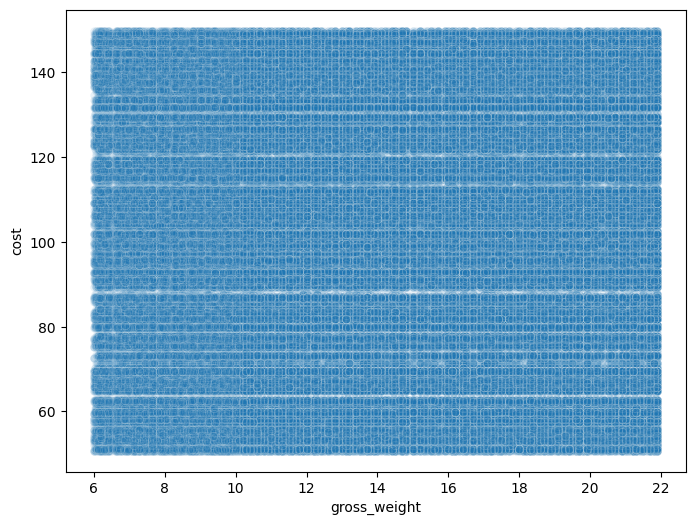

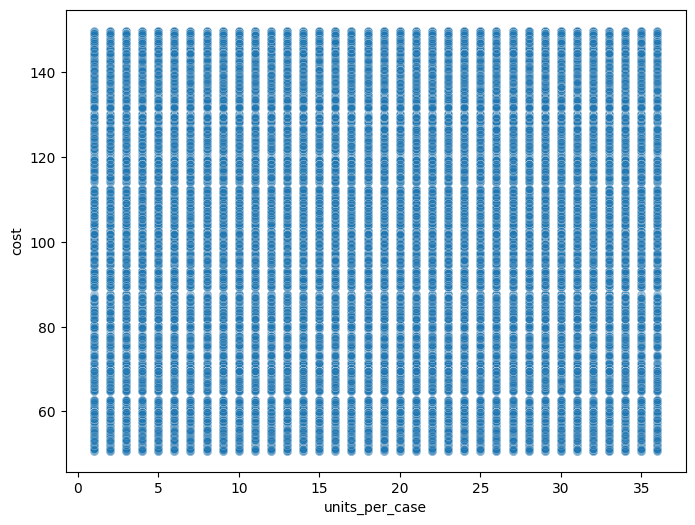

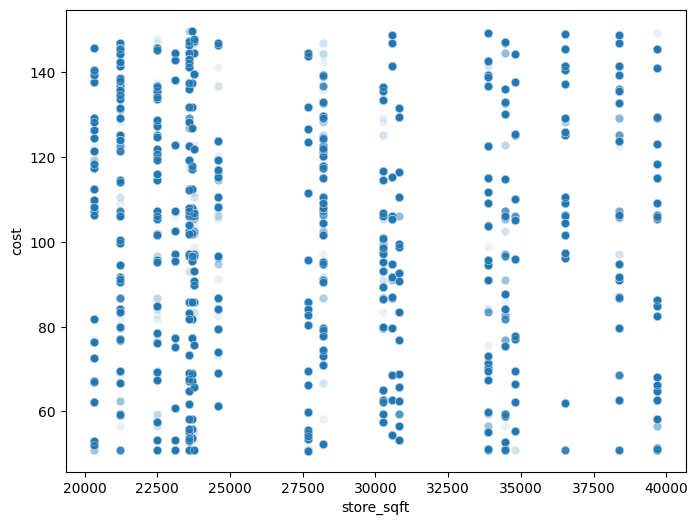

In [ ]:
for f in numerical_features:
  plt.figure(figsize=(8,6))
  sns.scatterplot(data=train_df,x=f, y='cost',alpha=0.1)
  plt.show()

The above plots display that the target values vary greatly for every feature. Nonetheless, we can observe some outliers - 'unit_sales(in millions)' values equal to 6 and 'store_sales(in millions)' values greater than 15. The instances with these values will be deleted.

In [ ]:
train_df.drop(train_df[train_df['unit_sales(in millions)']==6].index, inplace=True)
train_df.drop(train_df[train_df['store_sales(in millions)']>16].index, inplace=True)
test_df.drop(test_df[test_df['unit_sales(in millions)']==6].index, inplace=True)
test_df.drop(test_df[test_df['store_sales(in millions)']>16].index, inplace=True)


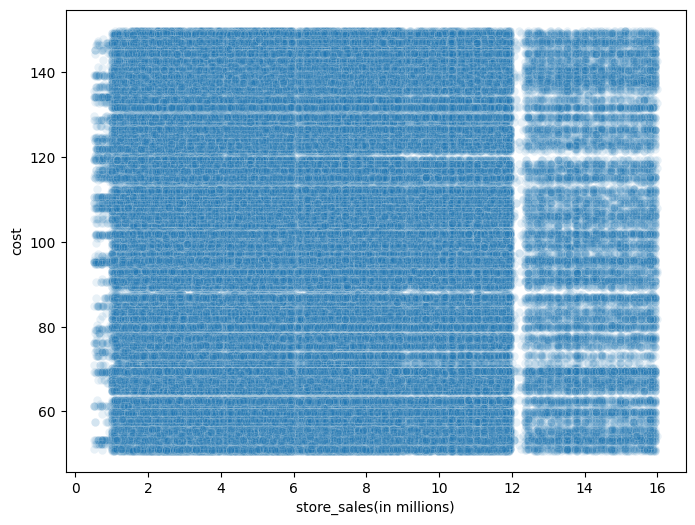

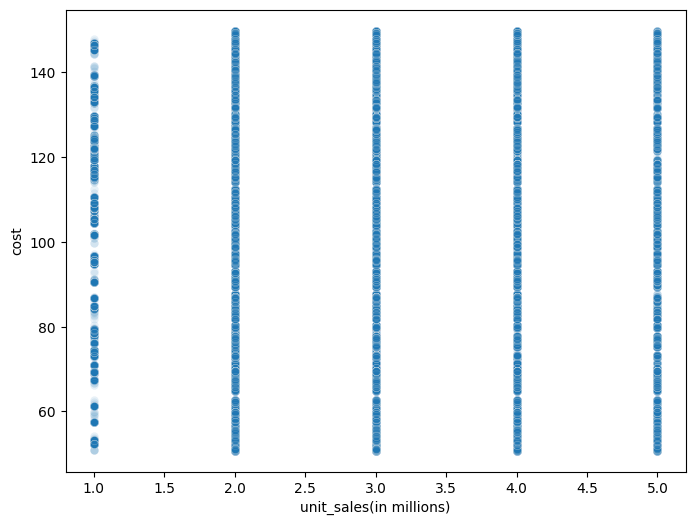

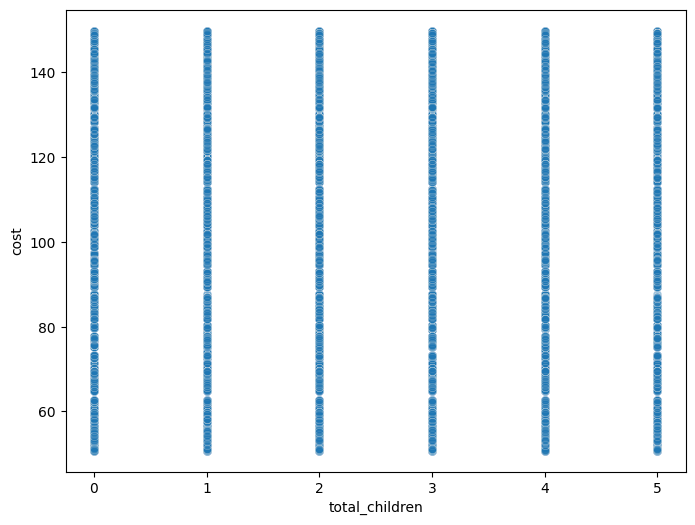

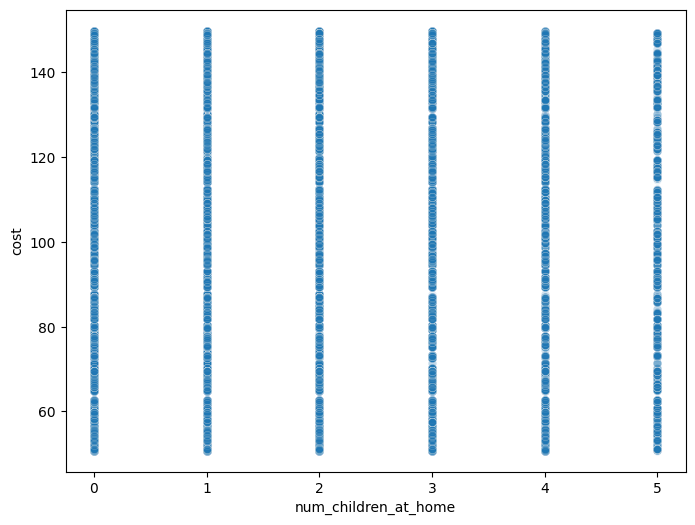

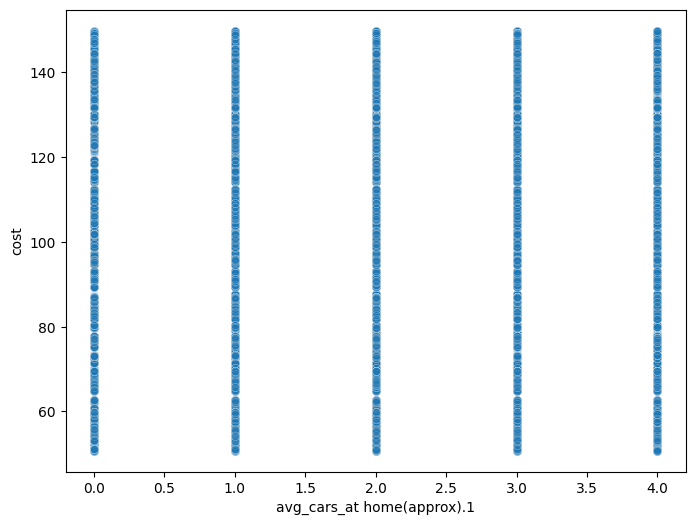

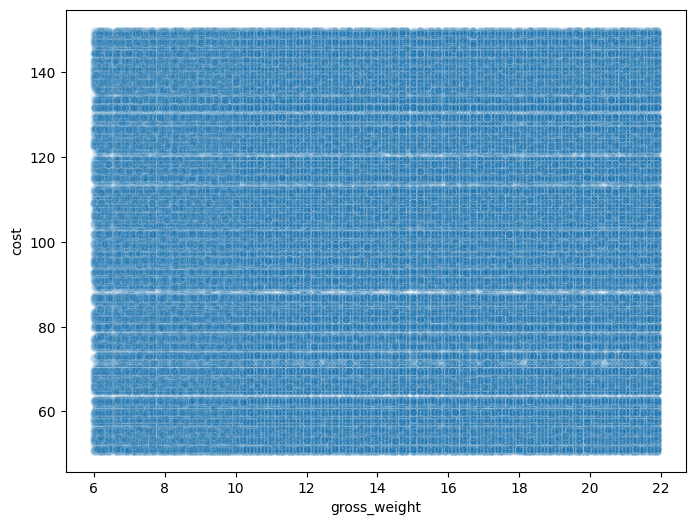

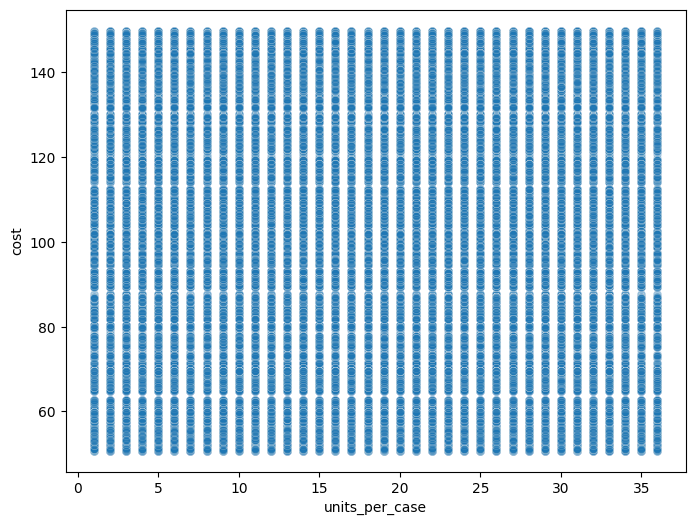

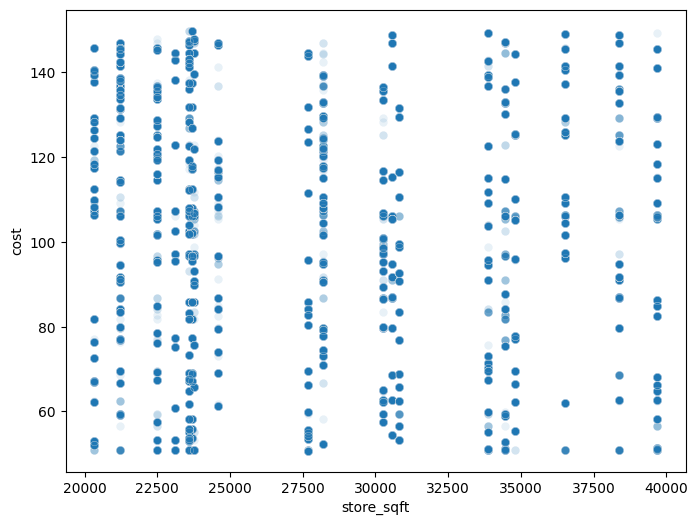

In [ ]:
for f in numerical_features:
  plt.figure(figsize=(8,6))
  sns.scatterplot(data=train_df,x=f, y='cost',alpha=0.1)
  plt.show()

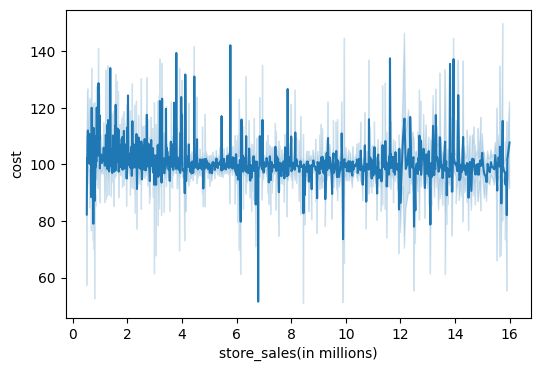

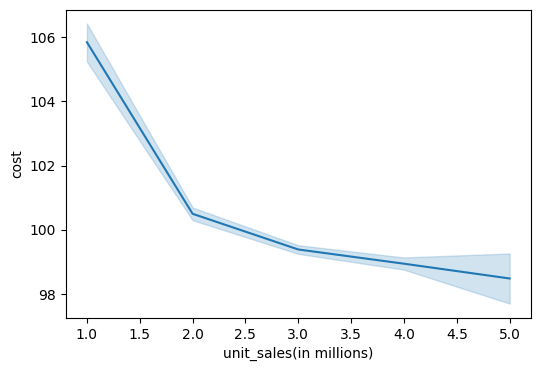

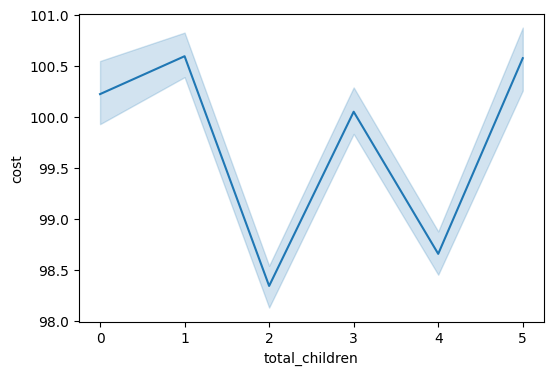

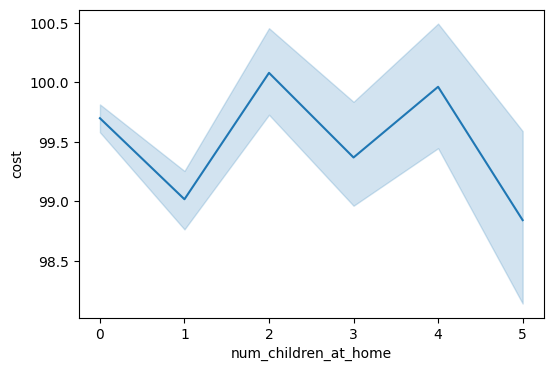

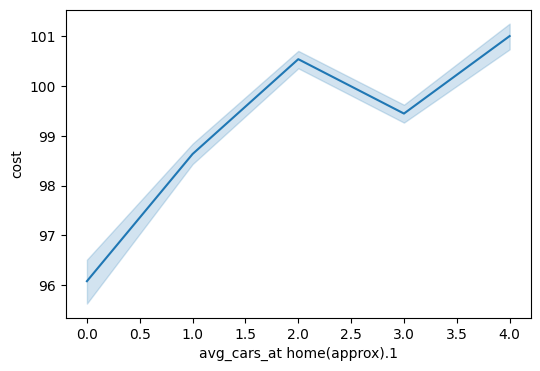

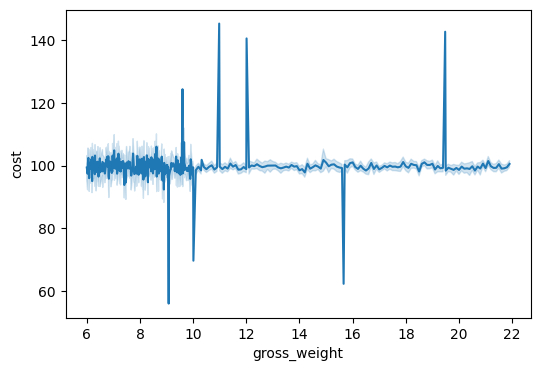

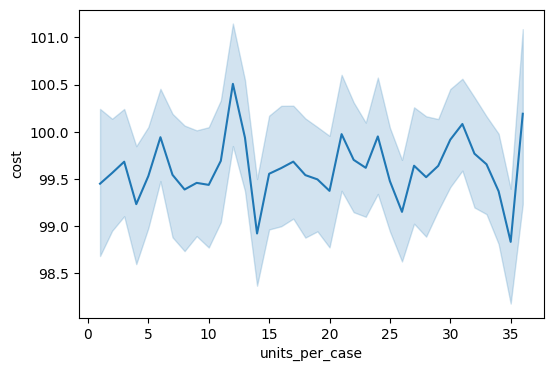

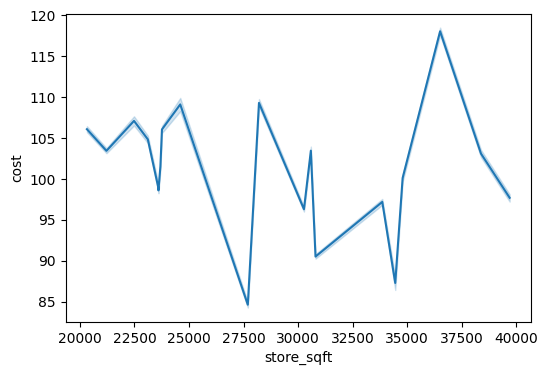

In [ ]:
for f in numerical_features:
  plt.figure(figsize=(6,4))
  sns.lineplot(data=train_df,x=f, y='cost')
  plt.show()

In [ ]:
train_df.drop(columns=['units_per_case','num_children_at_home'],inplace=True)
test_df.drop(columns=['units_per_case','num_children_at_home'],inplace=True)

After deleting certain features and instances, we plotted the correlations between the target and the numerical features again to check there is any other operation that can be performed before moving further, but there isn't.

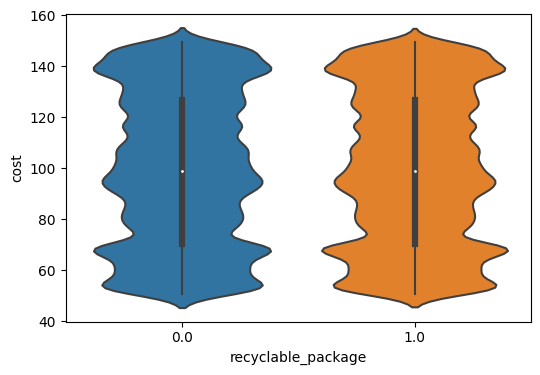

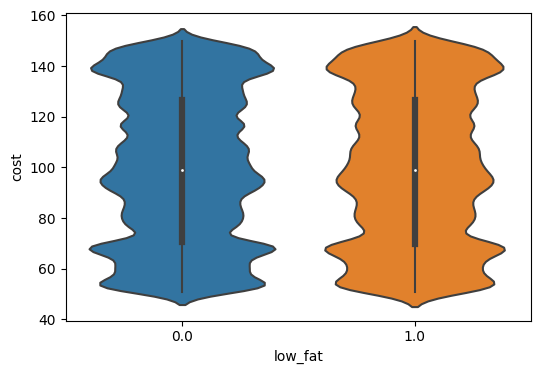

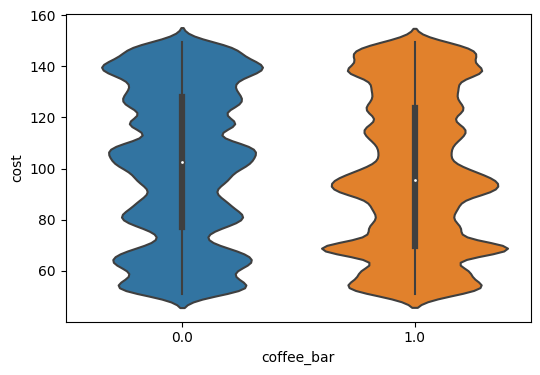

In [ ]:
for c in categorical_features:
  plt.figure(figsize=(6,4))
  sns.violinplot(data=train_df,x=c, y='cost')
  plt.show()

The above plots show the correlations between the target and the features which are in fact categorical. 'Recyclable_package', 'low_fat' and 'coffee_bar' seem the least correlated with the target, thus, they will be removed.

In [ ]:
train_df.drop(columns=['recyclable_package','low_fat','coffee_bar'],inplace=True)
test_df.drop(columns=['recyclable_package','low_fat','coffee_bar'],inplace=True)

KeyError: ignored

In [ ]:
train_df.head()

id  store_sales(in millions)  unit_sales(in millions)  total_children  \
0   0                      8.61                      3.0             2.0   
1   1                      5.00                      2.0             4.0   
2   2                     14.08                      4.0             0.0   
3   3                      4.02                      3.0             5.0   
4   4                      2.13                      3.0             5.0   

   avg_cars_at home(approx).1  gross_weight  store_sqft  video_store  \
0                         2.0         10.30     36509.0          0.0   
1                         3.0          6.66     28206.0          0.0   
2                         3.0         21.30     21215.0          0.0   
3                         0.0         14.80     21215.0          0.0   
4                         3.0         17.00     27694.0          1.0   

   prepared_food  florist    cost  
0            0.0      0.0   62.09  
1            0.0      0.0  121.80  
2            0.0      0.0   83.51  
3            0.0      0.0   66.78  
4            1.0      1.0  111.51

In [ ]:
train_df.corr()

id  store_sales(in millions)  \
id                          1.000000                  0.001599   
store_sales(in millions)    0.001599                  1.000000   
unit_sales(in millions)     0.000461                  0.470515   
total_children              0.003208                  0.061912   
avg_cars_at home(approx).1  0.003225                  0.005478   
gross_weight                0.001240                  0.039857   
store_sqft                 -0.000030                  0.022086   
video_store                -0.002634                  0.030439   
prepared_food              -0.002136                  0.045943   
florist                    -0.003406                  0.047219   
cost                       -0.000495                 -0.013169   

                            unit_sales(in millions)  total_children  \
id                                         0.000461        0.003208   
store_sales(in millions)                   0.470515        0.061912   
unit_sales(in millions)                    1.000000        0.108145   
total_children                             0.108145        1.000000   
avg_cars_at home(approx).1                 0.016213        0.078153   
gross_weight                               0.001129       -0.000580   
store_sqft                                 0.046090       -0.009002   
video_store                                0.054458       -0.013402   
prepared_food                              0.083444       -0.023655   
florist                                    0.083789       -0.012668   
cost                                      -0.027172       -0.007701   

                            avg_cars_at home(approx).1  gross_weight  \
id                                            0.003225      0.001240   
store_sales(in millions)                      0.005478      0.039857   
unit_sales(in millions)                       0.016213      0.001129   
total_children                                0.078153     -0.000580   
avg_cars_at home(approx).1                    1.000000     -0.002307   
gross_weight                                 -0.002307      1.000000   
store_sqft                                   -0.020169     -0.000655   
video_store                                   0.012653     -0.000848   
prepared_food                                -0.013066      0.002117   
florist                                      -0.004305      0.000755   
cost                                          0.027128     -0.000017   

                            store_sqft  video_store  prepared_food   florist  \
id                           -0.000030    -0.002634      -0.002136 -0.003406   
store_sales(in millions)      0.022086     0.030439       0.045943  0.047219   
unit_sales(in millions)       0.046090     0.054458       0.083444  0.083789   
total_children               -0.009002    -0.013402      -0.023655 -0.012668   
avg_cars_at home(approx).1   -0.020169     0.012653      -0.013066 -0.004305   
gross_weight                 -0.000655    -0.000848       0.002117  0.000755   
store_sqft                    1.000000    -0.083913       0.333252 -0.073992   
video_store                  -0.083913     1.000000       0.613616  0.615527   
prepared_food                 0.333252     0.613616       1.000000  0.598656   
florist                      -0.073992     0.615527       0.598656  1.000000   
cost                         -0.049254    -0.106779      -0.099033 -0.110565   

                                cost  
id                         -0.000495  
store_sales(in millions)   -0.013169  
unit_sales(in millions)    -0.027172  
total_children             -0.007701  
avg_cars_at home(approx).1  0.027128  
gross_weight               -0.000017  
store_sqft                 -0.049254  
video_store                -0.106779  
prepared_food              -0.099033  
florist                    -0.110565  
cost                        1.000000

As it can be observed, the features are not highly correlated with the target and they aren't correlated much with each other, except for 'salad_bar' and 'prepared_food'. 'Salad_bar' needs to be removed as a result.

In [ ]:
train_df.drop(columns=['salad_bar'],inplace=True)
test_df.drop(columns=['salad_bar'],inplace=True)

KeyError: ignored

Our dataset is quite large and non-linear with a great range of target values. Thus, we will choose to train the AdaBoostRegressor, which is capable of training large sets in a considerable amount of time. Features have different scales, thus, they will be scaled and also transformed by Polynomial Features due to the non-linearity of data.
To ensure the best possible results, we will use the GridSearchCV and serach for the best parameters.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

X=train_df.drop(['id','cost'],axis=1)
y=train_df[["cost"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

parameters={'polynomial_features__degree':[1,2,3,4,5]}

pipeline=Pipeline(steps=[('scaler',StandardScaler()),('polynomial_features',PolynomialFeatures()),('model',AdaBoostRegressor())])

gridsearch=GridSearchCV(pipeline,parameters,scoring='neg_mean_squared_error',cv=5)
gridsearch.fit(X_train,y_train)
print("\nThe best hyperparameters are:", gridsearch.best_params_, "\n")

model=gridsearch.best_estimator_
predictions = model.predict(X_test)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


The best hyperparameters are: {'polynomial_features__degree': 5} 

RMSE: 29.20748780687823
